In [4]:
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# 사고 발생 빈도
print("사고 발생 빈도 : ", train.shape[0])

# 사고 유형 빈도
print("사고 유형 빈도 : \n", train['사고유형'].value_counts())

# 사고 시간 빈도
# '사고일시'에서 시간만 추출
train['사고시간'] = pd.to_datetime(train['사고일시']).dt.hour
print("사고 시간 빈도 : \n", train['사고시간'].value_counts())

# 사고 요일 빈도
print("사고 요일 빈도 : \n", train['요일'].value_counts())

# 사고 월 빈도
# '사고일시'에서 월만 추출
train['사고월'] = pd.to_datetime(train['사고일시']).dt.month
print("사고 월 빈도 : \n", train['사고월'].value_counts())


사고 발생 빈도 :  39609
사고 유형 빈도 : 
 차대차     31785
차대사람     6833
차량단독      991
Name: 사고유형, dtype: int64
사고 시간 빈도 : 
 18    3398
17    2772
19    2739
16    2529
15    2374
14    2342
13    2198
20    2154
12    2104
11    2016
8     1924
10    1803
21    1749
9     1735
22    1506
7     1213
23    1096
0      828
6      750
1      669
2      520
5      467
4      367
3      356
Name: 사고시간, dtype: int64
사고 요일 빈도 : 
 금요일    6179
화요일    6023
수요일    5969
월요일    5895
목요일    5759
토요일    5670
일요일    4114
Name: 요일, dtype: int64
사고 월 빈도 : 
 10    3666
11    3577
5     3474
9     3413
6     3407
7     3381
8     3300
12    3262
4     3251
3     3052
1     3030
2     2796
Name: 사고월, dtype: int64


In [6]:
# ECLO 값에 따른 사고의 심각도
print("사고유형 별 ECLO : \n", train.groupby('사고유형')['ECLO'].mean())

사고유형 별 ECLO : 
 사고유형
차대사람    3.817650
차대차     4.944597
차량단독    4.006054
Name: ECLO, dtype: float64


In [7]:
import matplotlib.pyplot as plt

# MAC에서 한글 깨짐 이슈
# 폰트 직접 지정
plt.rcParams["font.family"] = 'AppleGothic'

import seaborn as sns

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False


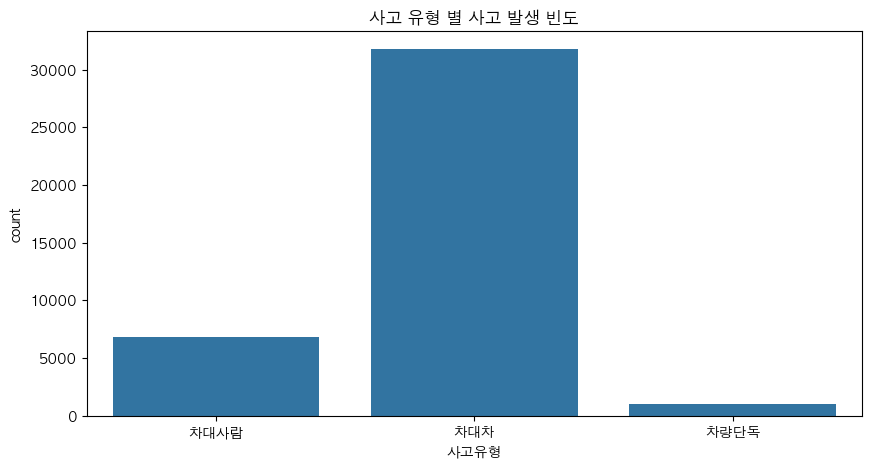

In [8]:
# 사고 유형 별 사고 발생 빈도
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='사고유형')
plt.title('사고 유형 별 사고 발생 빈도')
plt.show()

차대차 사고 유형 비율이 가장 높았다

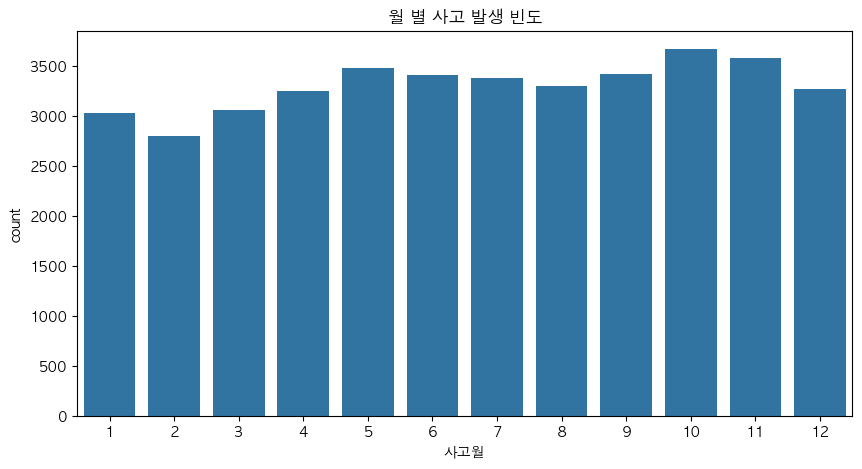

In [9]:
# 월 별 사고 발생 빈도
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='사고월')
plt.title('월 별 사고 발생 빈도')
plt.show()

월 별 사고 발생 빈도는 크게 차이나지 않았지만, 9~12월이 가장 높았다

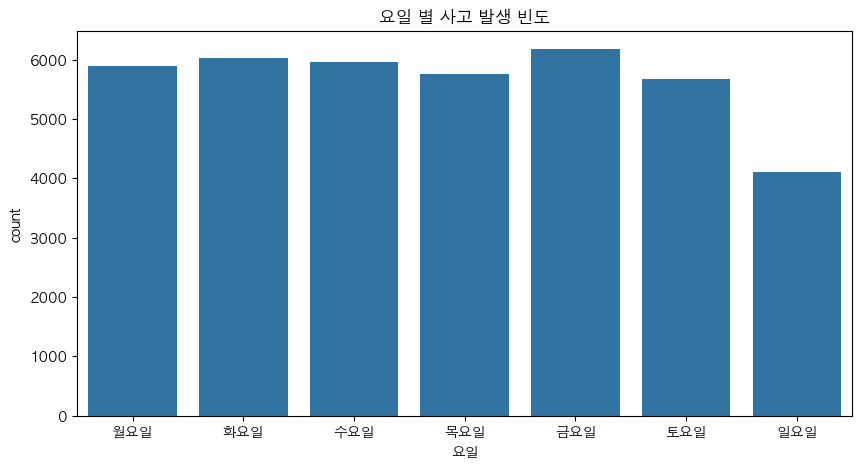

In [10]:
# 요일 별 사고 발생 빈도
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='요일', order=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.title('요일 별 사고 발생 빈도')
plt.show()

사고 발생 빈도는 금요일이 가장 높고 주말이 주중에 비해 낮았다

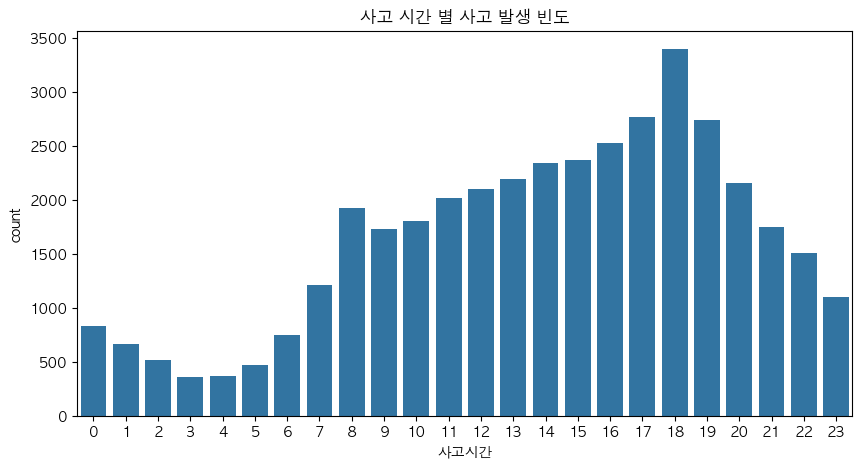

In [11]:
# 사고 시간 별 사고 발생 빈도
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='사고시간')
plt.title('사고 시간 별 사고 발생 빈도')
plt.show()

퇴근 시간대인 17~19시에 가장 사고 발생 빈도가 높았다

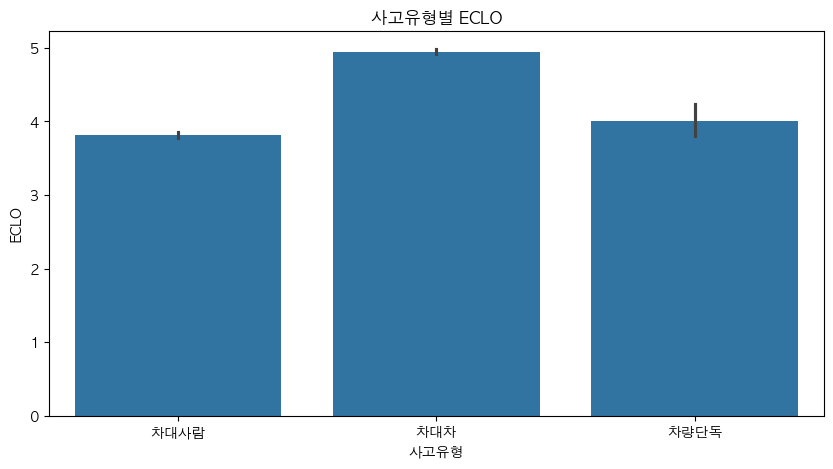

In [12]:
# ECLO 값에 따른 사고의 심각도
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='사고유형', y='ECLO')
plt.title('사고유형별 ECLO')
plt.show()

차대차 사고가 가장 사고 위험률이 높다

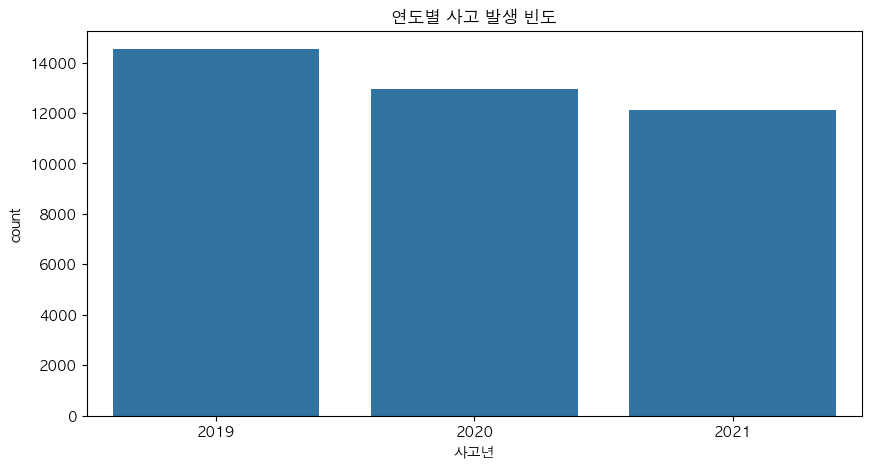

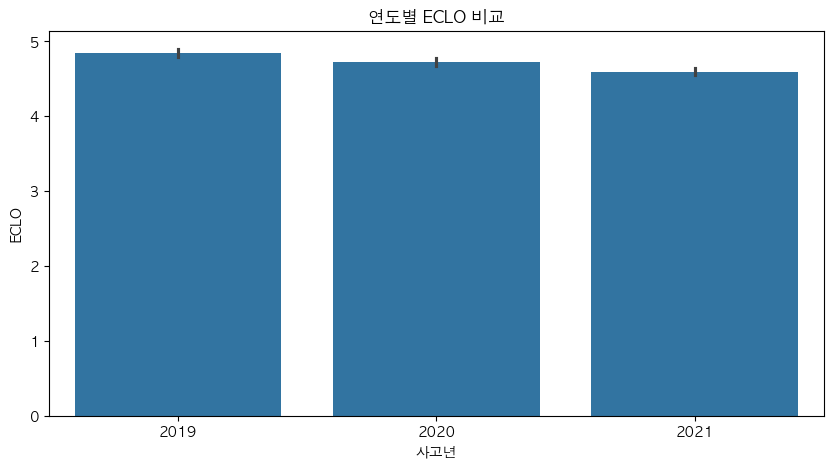

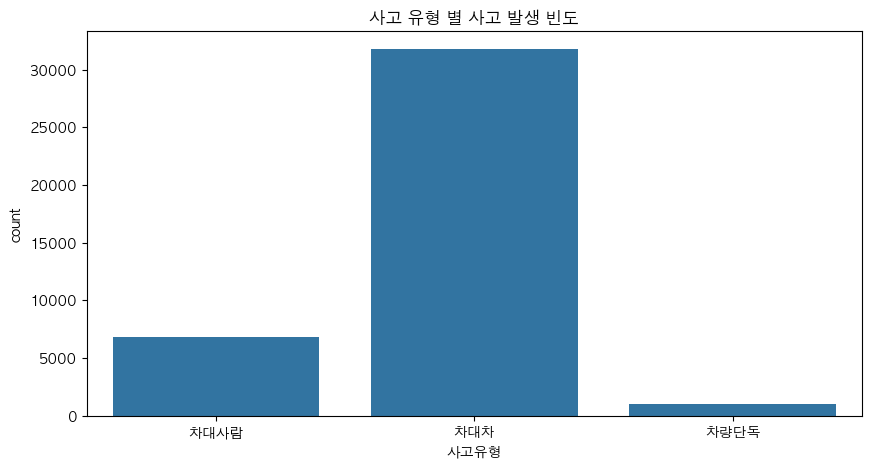

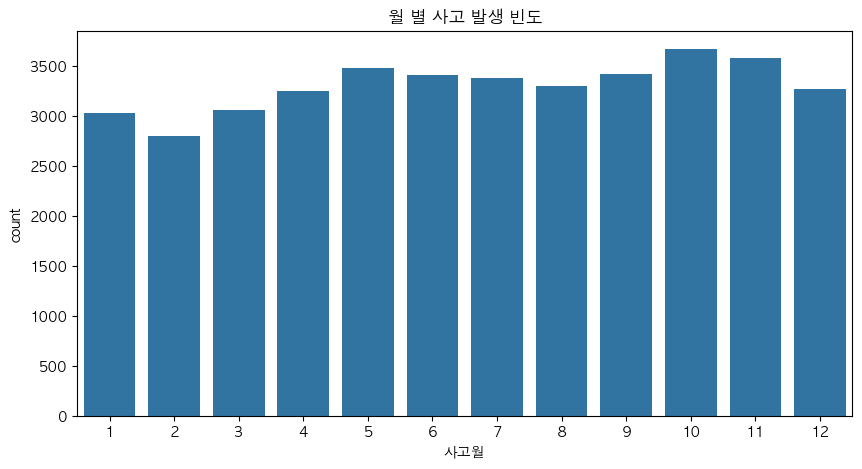

In [13]:

# 사고 시간 빈도
# '사고일시'에서 시간만 추출
train['사고시간'] = pd.to_datetime(train['사고일시']).dt.hour


# 사고 요일 빈도

# '사고일시'에서 월만 추출
train['사고월'] = pd.to_datetime(train['사고일시']).dt.month


# 연도별 사고 수 비교
# '사고일시'에서 연도만 추출
train['사고년'] = pd.to_datetime(train['사고일시']).dt.year
train['사고수'] = train['사망자수'] + train['중상자수'] + train['경상자수'] + train['부상자수']
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='사고년')
plt.title('연도별 사고 발생 빈도')
plt.show()

# 연도별 ECLO 비교
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='사고년', y='ECLO')
plt.title('연도별 ECLO 비교')
plt.show()


# 사고 유형 별 사고 발생 빈도
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='사고유형')
plt.title('사고 유형 별 사고 발생 빈도')
plt.show()

# 월 별 사고 발생 빈도
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='사고월')
plt.title('월 별 사고 발생 빈도')
plt.show()
